In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # import integrator routine


def simulate(f,
             init_state,
             t0=0,
             tf=1,
             N=500,
             size =(6, 4),
             show_plot=False):

    t = np.linspace(t0, tf, N)  # Create time span

    x_sol = []
    for x_init in init_state:
        # integrate system "sys_ode" from initial state $x0$
        x_sol.append(odeint(f, x_init, t))

    plt.figure(figsize=size)
    if show_plot:
        for sol in x_sol:
            plt.plot(t, sol, linewidth=2.0)
        plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
        plt.grid(True)
        plt.xlim([t0, tf])
        plt.ylabel(r'State $x$')
        plt.xlabel(r'Time $t$ (s)')
        plt.tight_layout()
    # show()
        plt.show()


    return x_sol


def phase_portrait(f,
                   x_range=[1, 1],
                   cmap='gray',
                   contour=False,
                   #    show_plot=False,
                   size=(7, 5),
                   density=0.95,
                   draw_grid=False,
                   ):

    x1_max, x2_max = x_range
    x1_span = np.arange(-1.1*x1_max, 1.1*x1_max, 0.1)
    x2_span = np.arange(-1.1*x2_max, 1.1*x2_max, 0.1)
    x1_grid, x2_grid = np.meshgrid(x1_span, x2_span)
    dx1, dx2 = f([x1_grid, x2_grid], 0)

    dist = (x1_grid**2 + x2_grid**2)**0.5
    lw = 0.8*(2*dist + dist.max()) / dist.max()

    # figure(figsize=size)
    plt.title('Phase Portrait')

    if contour:
        plt.contourf(x1_span, x2_span, dist, cmap=cmap, alpha=0.15)

    plt.streamplot(x1_span, x2_span, dx1, dx2, arrowsize=1.2,   density=density, color=dist,
               cmap=cmap, linewidth=lw, arrowstyle='->')  # ,color=L, cmap='autumn', linewidth = lw)

    plt.xlabel(r'State  $x_1$')
    plt.ylabel(r'State  $x_2$')

    plt.xlim([-x1_max, x1_max])
    plt.ylim([-x2_max, x2_max])
    if draw_grid:
        plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
        plt.grid(True)
    plt.tight_layout()
    # show()

    return None


## **Fundamentals of Robot Control:**
### **Lecture 2: Basics of Linear System Analysis and Control Design, Stability, Pole-placement and PD regulator**

Goals for today:

* Recall the analysis techniques for LTI systems: **stability**, pole placement, **controllability**, 
* Study the different approach for LTI controlability: **Hautus lemma**



### **Basics of System Analysis and Control Design**

### **Concepts of Stability**

Once the equlibrium or nominal motion is given, the natural question to ask is that how system will behave nearby.
This question is directly related to so called **stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near a point of equilibrium. This may be analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{e}$ stay near $\mathbf{x}_{e}$ forever, then $\mathbf{x}_{e}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{e}$ converge to $\mathbf{x}_e$, then $\mathbf{x}_{e}$ is asymptotically stable. 




A strict definitions are as follows:

Equilibrium $\mathbf{x}_e$ is said to be:
*   **Lyapunov stable** if:
$$
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_e\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_e\|<\epsilon, \quad \forall t
$$
*   **Asymptotically stable** if it is Lyapunov stable and:
$$
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_e\| = 0, \quad \forall t
$$
*   **Exponentially stable** if it is asymptotically stable and:
$$
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_e\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}, \quad \forall t  
$$

Conceptually, the meanings of the above terms are the following:

*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}$


### **Stability of LTI systems**

Let us start with stability of LTI systems:
$$
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x}
$$
An integral above can be calculated analytically:
$$
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
$$
where matrix exponential is defined via power series:
$$
 e^{\mathbf{A}t}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}t^k
$$



A natural questions to ask:
*   How to calculate this matrix exponential without power series?
*   Do we need can we analyze the behaviour of solutions without explicitly solving ODE?




Let us first consider the first question, assume for a while that we can do the following factorization:
$$
\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}  
$$

Thus defining new variables $\mathbf{z} = \mathbf{Q}^{-1}\mathbf{x}$ yields:
$$
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
$$
Which is in fact just a system of decoupled equations:
$$
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
$$
with known solutions:
$$
z^*_i = e^{\lambda_i t} z_i(0)
$$

Recalling that $\lambda_i$ is nothing but eigenvalues of matrix $\mathbf{A}$, thus one may discuss behavior of solution without explicitly calculating them, just by linear analysis on $\mathbf{A}$! 





The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:
$$
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
$$
where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$



Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:

---
* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i \leq 0, \forall i$,, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0, \forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 
---

**Example:**

Determine for which values of b the following system is stable and for which it is not:
$$
\ddot{y} + b\dot{y} + y = 0  
$$

First let us formulate the state space representation:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\ 
-1 & -b \\   
\end{bmatrix}
$$

the characteristing polynomial is:
$$
\Delta(\lambda) = \lambda^2 + \lambda b + 1
$$

with roots $\lambda_{1,2} = -\frac{b}{2} \pm \sqrt{(\frac{b}{2})^2 -1}$


Thus for $b>0$, $\operatorname{Re}{\lambda_i} < 0$ and system is stable, for $b<0$ $\operatorname{Re}{\lambda_i} > 0$ and system is unstable, while for $b = 0$ $\operatorname{Re}{\lambda_i} = 0$ and system is marginally stable.

**Example:**

Check the stability of ordinary 4-rd order differential equation in canonical form:
$$
y^{(3)} + 2\ddot{y} + 3\dot{y}  + y = 0  
$$

The system matrix is given by:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 \\ 
0 & 0 & 1 \\ 
-2 & -3 & -1 \\  
\end{bmatrix}
$$

Let us calculate eigen-values:

In [3]:
A = np.array([[0, 1, 0],
              [0, 0, 1], 
              [-2, -3, -1]])
              
lambdas, Q = np.linalg.eig(A)
np.real(lambdas)

array([-0.71522524, -0.14238738, -0.14238738])

array([-2.51154714,  0.75577357,  0.75577357])

The very similar analysis may be performed in case of **discrete dynamics** in form:
$$
\mathbf{x}_{k+1}=\mathbf{A}\mathbf{x}_k
$$

And the stability criterion will be as follows:

---
* Bounded if $ |\lambda_i|\leq 1,\forall i$, hence the system is **Lyapunov stable**. 
* Decreasing if $|\lambda_i| < 1,\forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, |\lambda_i|>1 $, hence the system is **unstable**. 
---

**Exercise:**
Consider again the 'damper system' described by matrix:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\ 
-1 & -b \\   
\end{bmatrix}
$$

Suppose that you know that $|b|<2$, does this imply that system is stable? If not, find the tightest bound on $b$.

### **From Analysis to Design: Pole placement**
As we have seen above, the proof of stability of a linear system is fairly straightforward and can be carried out through the analysis of eigenvalues, the natural question arises: can we transform an unstable system into a stable one by means of control? 

To answer this let us consider a LTI system:
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
$$


with control $\mathbf{u}$ being the **full state linear feedback**:
$$
\mathbf{u} = \boldsymbol{\phi}(\mathbf{x}) = -\mathbf{K}\mathbf{x}
$$

Substitution to system dynamics yields following closed loop relations:
$$
\dot{\mathbf{x}} = (\mathbf{A}-\mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
$$

Thus the control design dedicated to stabilize original system **seen as modifying the eigen values of matrix $\mathbf{A}_c$ such that the resulting system will have required properties** (namely stability, response time etc). 

This method is called **pole-placement** (poles - are other names for eigen values).



In [4]:
from scipy.signal import place_poles

Let us test the pole placement technique to stabilize several linear systems.

**Example: Pole placement for mass-spring, PD regulator.**

Consider the mass-spring system:

$$
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & 0
\end{bmatrix}
 \begin{bmatrix}
 y\\
\dot{y}
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}
\end{bmatrix}u
$$

In case of this two dimensional linear mechanical system we can put the poles analytically. Thus arriving to so called PD controller $u = -k_1 y - k_2 \dot{y}$. 

Indeed the characteristic polynomial of closed loop system $\mathbf{A - B\mathbf{K}}$ is:
$$
\Delta(\lambda) = \lambda(\lambda + k_2) + \frac{k+ k_1}{m}  = \lambda^2 +  \frac{k_2}{m}\lambda + \frac{k+ k_1}{m}
$$

Obviously we can place poles whatever we want by varying $k_1, k_2$.


**Example: Pole placement for DC motor**
Design the controller that will steer angle for the DC motor driven by the voltage $V$ with state space representation:

$$
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{i}
\end{bmatrix} =
\begin{bmatrix}
0 & 1 & 0 \\
0 & -\frac{b}{J} & \frac{K_m}{J} \\
0 & -\frac{K_e}{L} & -\frac{R}{L}
\end{bmatrix} 
\begin{bmatrix}
\theta \\
\dot{\theta} \\
i
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
\frac{1}{L}
\end{bmatrix}V
$$


Let's define parameters first:

In [5]:
k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

The state space matrices:

In [6]:
A_dc = [[0, 1, 0],
        [0, -b/J, k_m/J],
        [0, -k_e/L, -R/L]]

B_dc = [[0],
        [0],
        [1/L]]


Let us try to place the poles in the following locations:

[-10. +0.j -20.+50.j -20.-50.j]


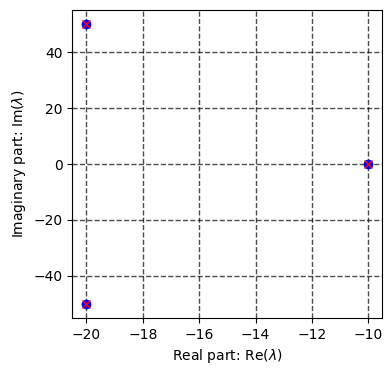

In [23]:
P = 10*np.array([-1+0j, -2+5j, -2 - 5j])

K_dc = place_poles(np.array(A_dc), np.array(B_dc), np.array(P)).gain_matrix
Ac = A_dc - B_dc@K_dc
eigs = np.linalg.eigvals(Ac)
print(eigs)

plt.figure(figsize=(4, 4))
plt.plot(P.real, P.imag, 'bo', label='Desired')
plt.plot(eigs.real, eigs.imag, 'rx',label='Actual')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
plt.ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
plt.show()

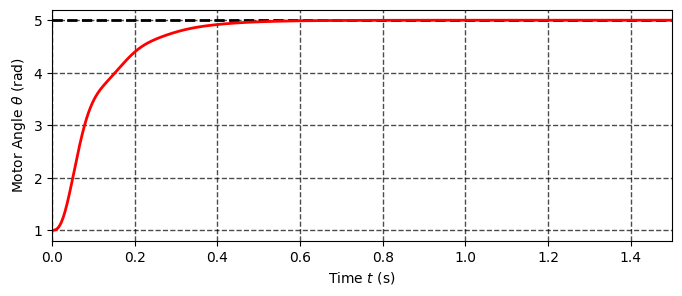

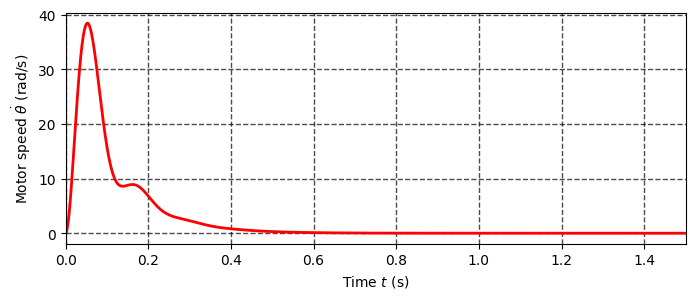

In [24]:
def system_ode(x, t, A, B, K, x_d):
    x_e = x_d - x 
    u = np.dot(K,x_e)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

tf = 1.5 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

# Set initial state
x0 = [1, 0, 0]  
# Desired point
x_d = [5, 0, 0]

x_sol = odeint(system_ode, x0, t, args=(A_dc, B_dc, K_dc,x_d,)) # integrate system "sys_ode" from initial state $x0$
theta, dtheta, i = x_sol[:,0], x_sol[:,1], x_sol[:,2] # set theta, dtheta to be a respective solution of system states


plt.figure(figsize=(8, 3))
plt.hlines(x_d[0], min(t), max(t), color = 'black', linestyles='--', linewidth=2.0)
plt.plot(t, theta, 'r', linewidth=2.0)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, tf])
plt.ylabel(r'Motor Angle ${\theta}$ (rad)')
plt.xlabel(r'Time $t$ (s)')
plt.show()


plt.figure(figsize=(8, 3))
# plt.hlines(x_d[0], min(t), max(t), color = 'black', linestyles='--', linewidth=2.0)
plt.plot(t, dtheta, 'r', linewidth=2.0)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, tf])
plt.ylabel(r'Motor speed ${\dot{\theta}}$ (rad/s)')
plt.xlabel(r'Time $t$ (s)')
plt.show()




That's all good, but what are the conditions on which we can place poles? Can we do this always for whatever $\mathbf{A}$ and $\mathbf{B}$? 


Let us for example consider the following linear system:

$$
\begin{cases}
    \dot{x}_1 = x_1 + x_2 + u\\
    \dot{x}_2 = ax_2 
\end{cases} 
$$



Which can be transformed to LTI state space via:

$$
\mathbf{A} = 
\begin{bmatrix}
a & 1 \\ 
0 & b \\   
\end{bmatrix}, 
\quad\mathbf{B} = 
\begin{bmatrix}
1 \\ 
0 \\   
\end{bmatrix}
$$

Let us define the system and place poles:

In [26]:
a = -1
b = 1
A = np.array([[1, 1],
              [0, a]])

B = np.array([[1],
              [0]])

P = np.array([-1, -4])
K = place_poles(np.array(A), np.array(B), np.array(P)).gain_matrix
K

array([[5., 1.]])

Given the feedback $\mathbf{u} = -k_1 x_1 - k_2 x_2$ the characteristic polynomial is:
$$
\Delta(\lambda) = (\lambda - a + k_1)(\lambda - b)
$$
so we can't place poles at **any** desired locations (at least one of them), does it necessarily mean that we can't stabilize the system above? 

We can't hope to place poles whenever we want for any desired system. In the end it may happen that system can't be controlled at all or there is certain directions in the state space that are not achievable. 

### **Controlability**

Controllability is an important property of a control system, and the controllability property plays a crucial role in many control problems, such as stabilization of unstable systems by feedback, or optimal control. Roughly, the concept of controllability denotes the ability to move a system around in its entire configuration space using only certain admissible manipulations. 

The most widely used notions of controlability was introduce by Kalman with help of following $n\times nm$ matrix:

$$
\boldsymbol{\mathcal{C}}=
\begin{bmatrix}
\mathbf{B}&
\mathbf{AB}&
\mathbf{A^{{2}}B}&
...&
\mathbf{A^{{n-1}}B}
\end{bmatrix}
$$

The theory says that system is **full state controllable iff** the controllability matrix has full row rank:

$$
\text{rank}\{\boldsymbol{\mathcal{C}}\}
=n
$$

There are tight relationships between controlability and pole placement technique, if system is **controlable** one may place poles **at any desired locations**. In fact in most pole-placement algorithms (for instance celebrated [Ackerman formula](https://en.wikipedia.org/wiki/Ackermann%27s_formula)) one need to invert controllability matrix! 

The code that implement above is straight forward:

In [27]:
def ctrb(A, B):
    C = B
    n = np.shape(A)[0]
    # print(n)
    for i in range(1, n):
        A_pwr_n = np.linalg.matrix_power(A, i)
        C = np.hstack((C, A_pwr_n.dot(B)))
    rank_C = np.linalg.matrix_rank(C)

    if rank_C == n:
        test = 'controllable'
    else:
        test = 'uncontrollable'
    return C, rank_C, test

Let's test the controllability of systems that we have considered above. 

In [28]:
ctrb(A, B)

(array([[1, 1],
        [0, 0]]),
 1,
 'uncontrollable')

Now we can test for controllability just by analyzing the products of $\mathbf{A}$ and $\mathbf{B}$ matrices. However there are two issues with celebrated Kalman method. First of all - it is **numerically not stable** (the powers of $\mathbf{A}$ is prone to accumulation of errors for higher dimensions of $n$ and badly scaled $\mathbf{A}$ and $\mathbf{B}$). 

**Example: Wrong Controlability for DC motor**

Consider the DC motor given above with following parameters:


In [29]:
k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

Let us run controllability test:

In [30]:
A = [[0, 1, 0],
        [0, -b/J, k_m/J],
        [0, -k_e/L, -R/L]]

B = [[0],
        [0],
        [1/L]]

ctrb(A, B)

(array([[ 0.00000000e+00,  0.00000000e+00,  3.08624593e+09],
        [ 0.00000000e+00,  3.08624593e+09, -4.48908834e+15],
        [ 3.63636364e+05, -5.28925620e+11,  7.69315606e+17]]),
 2,
 'uncontrollable')

Oups the answer is surprising, even though we were able to place poles the system is said to be uncontrollable. The issues are indeed numerical (check the inductance parameter $L$)  

Appart from numerical issues, there is also fundamental one, Kalman controllability is "binary", basically we have just yes/no answer, while there is no information on structure of problem, i.e. which directions are uncontrollable and why. Fortunately there is another method that allow us to study linear controllability problem.  

### **Popov-Belevitch-Hautus Controllability**

The alternative view of controlability was provided separately by  Hautus, Popov and Belevitch in the 1970-th. it is known as **Hautus lemma**, also commonly known as the Popov-Belevitch-Hautus test or PBH test.

The lemma is stated as follows, pair $\{\mathbf{A}, \mathbf{B}\}$ is said to be controllable iff:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \zeta \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \zeta \in 
  \mathbb{C}
$$




However the only way for $\mathbf{A} - \lambda\mathbf{I}$ to lose the rank is for $\lambda$ to be the eigenvalue of $\mathbf{A}$, thus instead of checking the entire complex plane we may consider just the eigenvalues:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall i \in 
  \{1, 2,\dots, n\}
$$


In [35]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    test = 'controllable'
    for i in range(n):
      A_e = A - lambdas[i]*np.eye(n)
      M = np.hstack((A_e, B))
      ranks[i] = np.linalg.matrix_rank(M)
      if ranks[i] != n:
        test = 'uncontrollable'
    return lambdas, ranks , test

In [36]:
eigs, ranks, test = pbh(A_dc,B_dc)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )

Eigen values of PBH matrices:
[ 0.00000000e+00 -5.92260385e+01 -1.45448732e+06]

Ranks of the PBH matrices: [3, 3, 3],
system is controllable


it is interesting to see that:
$$
\mathbf{B}
\notin
\mathcal{C}(\mathbf{A} - \lambda_i \mathbf{I})
\quad
\forall i \in 
\{1, 2,\dots, n\}
$$

The matrix $\mathbf{B}$ better to not be aligned with **some of the eigenvectors** 

In [37]:
lambdas, v = np.linalg.eig(A)
B = [v[:,0]]
B = np.array(B).T
# B = B_cp
# R, rank, test = ctrb(A_cp, B)
# print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}\n' )

eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


Eigen values of PBH matrices:
[ 0.00000000e+00 -5.92260385e+01 -1.45448732e+06]

Ranks of the PBH matrices: [3, 2, 2],
system is uncontrollable


Thus PBH test give us some tips on how matrix $\mathbf{B}$ should be organized! Moreover condition above provide the insight on the **minimal number of the control channels** that we need for sytem to be controllable and is directly related to the multiplicity of the eigenvalues

In [38]:
n = len(lambdas)

for i in range(n):
    A_e = A - lambdas[i]*np.eye(n)
    print(f'Eigenvalue s: {lambdas[i]}')
    print(f'Rank of A - sI: {np.linalg.matrix_rank(A_e)}')
    print(f'Rank difficiency: {n - np.linalg.matrix_rank(A_e)}\n')

Eigenvalue s: 0.0
Rank of A - sI: 2
Rank difficiency: 1

Eigenvalue s: -59.2260384876281
Rank of A - sI: 2
Rank difficiency: 1

Eigenvalue s: -1454487.3150204099
Rank of A - sI: 2
Rank difficiency: 1



As we can see the PBH test is much more applicable and practical, this will become even more evident when we start working with systems with relatively large dimensions - derived with data driven approaches.


Moreover PBH test can be used to analyze some other interesting properties, namely directions of 'natural stability' and which are need to be stabilized with control!

Let us for example consider the following linear system:

$$
\begin{cases}
    \dot{x}_1 = a x_1 + x_2 + u\\
    \dot{x}_2 = bx_2 
\end{cases} 
$$

with $a = -1, b = -1$

Which can be transformed to LTI state space via:

$$
\mathbf{A} = 
\begin{bmatrix}
-1 & 1 \\ 
0 & -1 \\   
\end{bmatrix}, 
\quad\mathbf{B} = 
\begin{bmatrix}
1 \\ 
0 \\   
\end{bmatrix}
$$

In [39]:
A = np.array([[-1, 1],
              [0, -1]])

B = np.array([[1],
              [0]])


It is trivial to show that all trajectories converges to $\mathbf{x} = 0$ with linear feedback $u = -2x_2$ (check the eigenvalues). 

In [40]:
K = np.array([[0, 2]])
lambdas, Q = np.linalg.eig(A - B@K)
print(np.real(lambdas))

[-1. -1.]


Let us simulate this system:

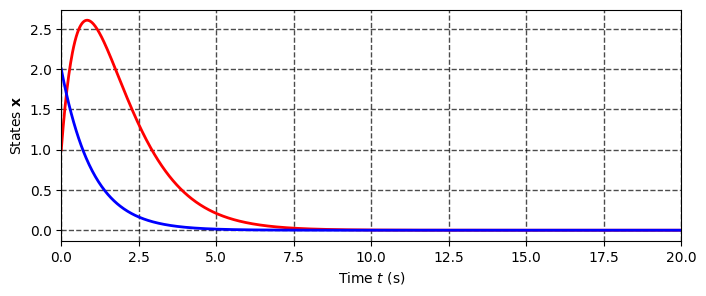

In [41]:
def system_ode(x, t, A, B, K):
    u = np.dot(K,x)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

tf = 20# Final time
N = int(1E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

# Set initial state
x0 = [1, 2]  

x_sol = odeint(system_ode, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
x_1, x_2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

plt.figure(figsize=(8, 3))
plt.plot(t, x_1, 'r', linewidth=2.0)
plt.plot(t, x_2, 'b', linewidth=2.0)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, tf])
plt.ylabel(r'States $\mathbf{x}$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

Let us check what the PBH will conclude:

In [42]:
eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )

Eigen values of PBH matrices:
[-1. -1.]

Ranks of the PBH matrices: [1, 1],
system is uncontrollable


So PBH state that system is uncontrollable while we were able to stabilize it with linear feedback! The issue that the problems of stabilizability and controllability are not equivalent.

### **Stabilizability**

A slightly weaker notion than controllability is that of stabilizability. A system is said to be stabilizable when all uncontrollable state variables can be made to have stable dynamics. Thus, even though some of the state variables **cannot be controlled** (as determined by the controllability test above) all the state variables will still remain **bounded during** the system's behavior.

**Stabilizable** systems should be controllable only for the unstable eigenvalues i.e:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \lambda \in \{c: \text{Re}(c)\geq0\}
$$

One can slightly modify the controllability test to have following:

In [44]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    # M = n*[0]
    unctrl_eigs = []
    test = 'controllable'
    for i in range(n):
        M = np.hstack((A - lambdas[i]*np.eye(n), B))
        ranks[i] = np.linalg.matrix_rank(M)
        if ranks[i] != n:
            unctrl_eigs.append(lambdas[i])

    if np.all(np.array(unctrl_eigs) < 0):
        test = 'uncontrollable but stabilizable'

    else:
        test = 'uncontrollable'

    return lambdas, ranks, test



In [45]:

eigs, ranks, test = pbh(A, B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}')


Eigen values of PBH matrices:
[-1. -1.]

Ranks of the PBH matrices: [1, 1],
system is uncontrollable but stabilizable


Thus, for linear systems we can address a variety of issues using **numerical techniques based on linear algebra**, moreover, the controller **synthesis is also performed numerically** - with pole placement.